<b><h2>Heart Disease Prediction Project</h2></b>
<b><h3>💖 Introduction to the Heart Disease Prediction Project </h3></b>

<p>Heart disease is a major global health concern, responsible for a significant number of deaths annually. Early and accurate prediction of heart disease is crucial for effective treatment and preventative care. However, manual diagnosis based on various risk factors can be complex and time-consuming. This project leverages the power of <b>machine learning</b> 🤖 to develop a robust system that can predict the likelihood of heart disease in a patient.</p>

<p>By analyzing a comprehensive dataset of medical attributes such as <b>age, sex, blood pressure, cholesterol levels</b>, and other key indicators, our model provides a data-driven approach to risk assessment. We utilized several machine learning algorithms to build, train, and evaluate a predictive model that assists healthcare professionals in making informed decisions and helps patients take proactive steps toward better health. 🩺 This system aims to enhance diagnostic accuracy, reduce the workload on medical staff, and ultimately, save lives. ❤️‍🩹</p>

   <h3>Project Process</h3>

   <ol>
        <li><b>Data Collection and Preprocessing</b>: We gathered a comprehensive dataset of patient medical attributes, including <b>age, sex, blood pressure, and cholesterol levels</b>. The data was then cleaned and prepared for analysis.</li>
        <li><b>Model Selection and Training</b>: We selected and trained several machine learning algorithms, such as <b>Logistic Regression, Support Vector Machines, and Random Forest</b>, to find the best fit for our dataset.</li>
        <li><b>Model Evaluation</b>: The trained models were evaluated using various metrics like <b>accuracy, precision, and recall</b> to assess their performance and ensure they could make reliable predictions.</li>
        <li><b>Deployment</b>: The final, optimized model was deployed to assist healthcare professionals in making data-driven decisions.</li>
    </ol>

<hr>

<h3>Author: Brejesh Balakrishnan</h3>
<p><b>LinkedIn Profile:</b> <a href="https://www.linkedin.com/in/brejesh-balakrishnan-7855051b9/">LinkedIn</a></p>
<p><b>GitHub Profile:</b> <a href="https://github.com/brej-29">GitHub</a></p>


<b>Importing</b>

In [1]:
# Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Model Creation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

<b>Exploratory Data Analysis</b>

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

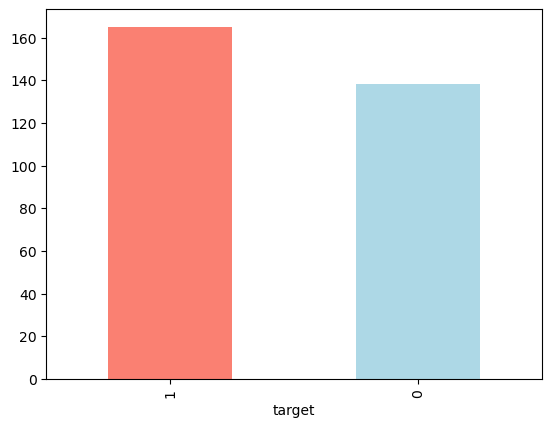

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon", "lightblue"])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Feature Comparison</b>

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


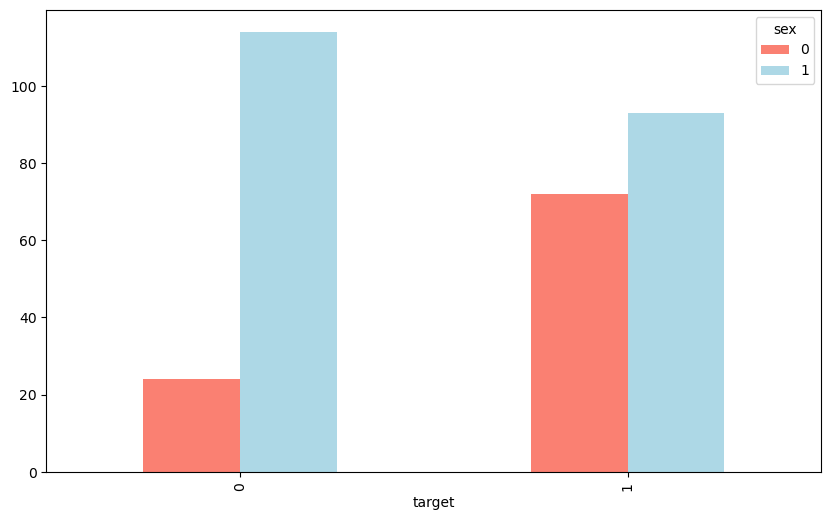

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.show()

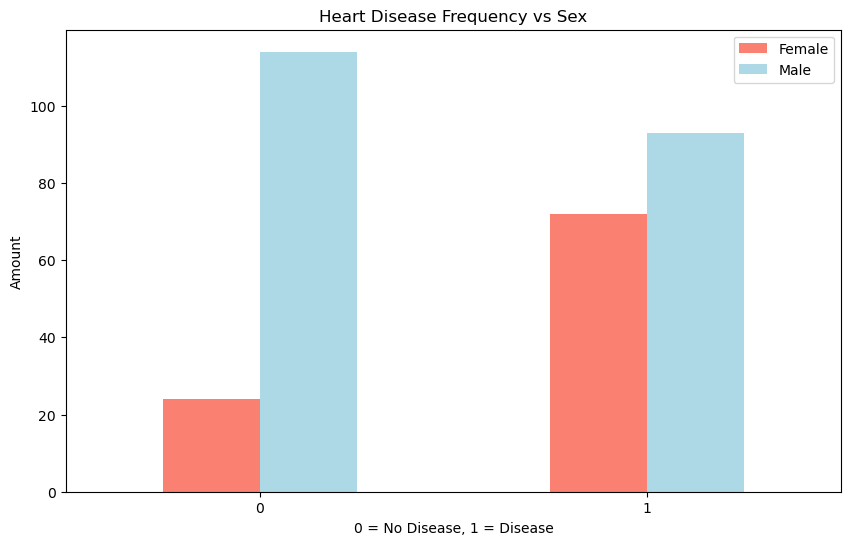

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

The visualization of <b>heart disease frequency by sex</b> clearly indicates a higher prevalence of heart disease among males within our dataset.

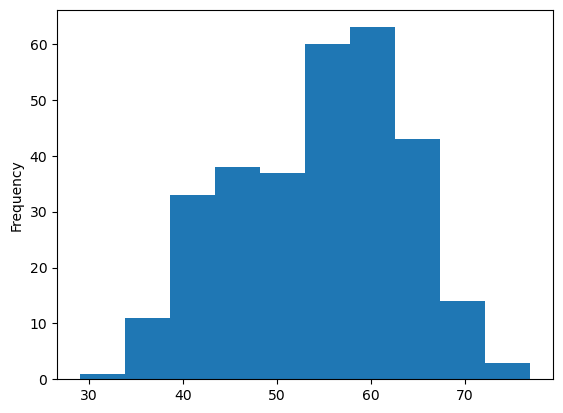

In [14]:
df.age.plot.hist()
plt.show()

The histogram shows that the majority of patients in our dataset are between 50 and 60 years old. This insight helps us understand the primary age group at risk in this population and informs our model's feature engineering.

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


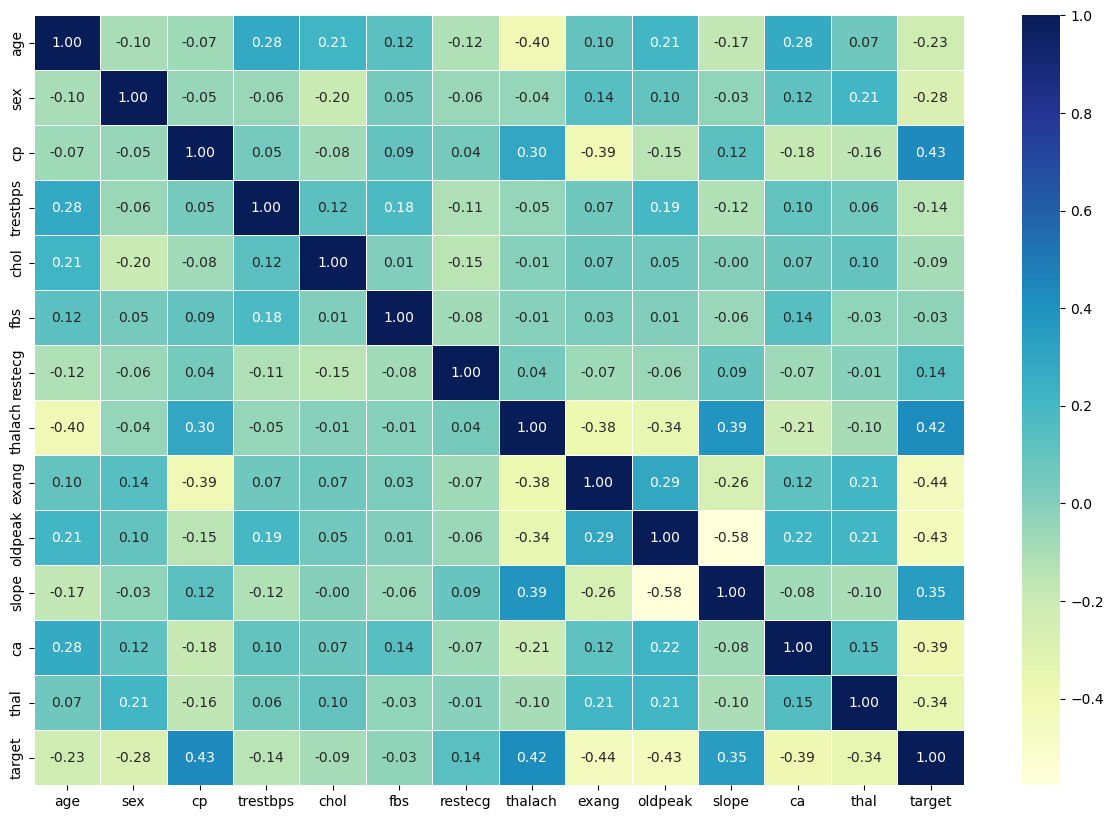

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f",cmap="YlGnBu")
plt.show()

The correlation heatmap provides crucial insights into the relationships between features in our dataset. The target variable, which indicates the presence of heart disease, shows the strongest positive correlations with cp (chest pain type), exang (exercise-induced angina), slope, ca (major vessels colored by fluoroscopy), and thal. Conversely, it has the strongest negative correlations with thalach (maximum heart rate achieved) and oldpeak. These findings highlight the most influential factors for heart disease prediction and serve as a foundation for building a robust machine learning model.

<b>Key Observations:</b>

<b>Strongest Positive Correlates:</b> cp, exang, slope, ca, and thal.

<b>Strongest Negative Correlates:</b> thalach and oldpeak.

<b>Weak Correlates:</b> Features like chol (cholesterol) and fbs (fasting blood sugar) show very weak correlations with the target variable, suggesting they may have less predictive power on their own.

<b>Model Creation</b>

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=df.drop(labels="target", axis=1)
y=df.target.to_numpy()

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y, type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [23]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


<b>Model Selection</b>

In [25]:
models = {"KNN":KNeighborsClassifier(),
          "LogisticRegression":LogisticRegression(max_iter=100),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\Data Science\Logicmojo-AI-DataScience-Assignment-HeartDiseasePrediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

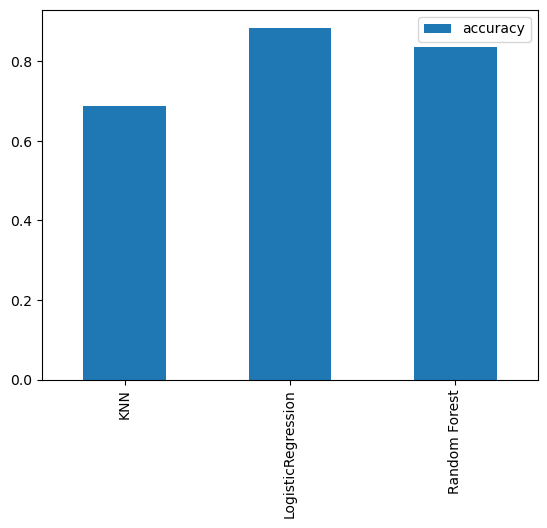

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

<b>Model Finetuning and Selection</b>

KNN (K - Nearest Neighbours)

In [28]:
train_scores= []
test_scores=[]
neighbors = range(1,51)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [29]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058,
  0.6859504132231405,
  0.6694214876033058,
  0.7024793388429752,
  0.6735537190082644,
  0.6983471074380165,
  0.6942148760330579,
  0.6983471074380165,
  0.6859504132231405,
  0.6818181818181818,
  0.6735537190082644,
  0.6570247933884298,
  0.6652892561983471,
  0.6694214876033058,
  0.6487603305785123,
  0.6528925619834711,
  0.6611570247933884,
  0.6735537190082644,
  0.6528925619834711,
  0.6570247933884298,
  0.6570247933884298,
  0.6694214876033058,
  0.6735537190082644,
  0.6694214876033058,
  0.6570247933884298,
  0.6818181818181818,
  0.6776859504132231,
  0.681

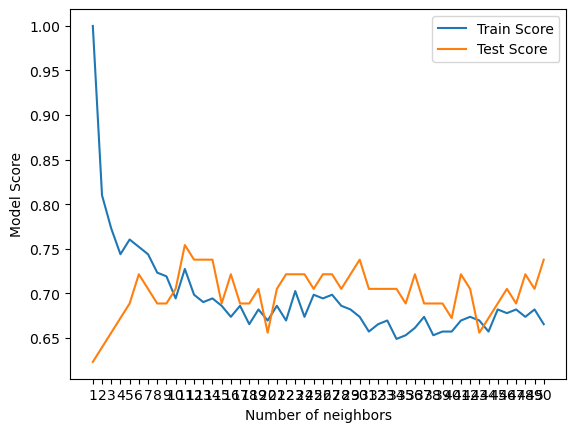

In [30]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label ="Test Score")
plt.xticks(np.arange(1,51,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()

Logistic Regression

In [37]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [38]:
%%time 

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1.27 s
Wall time: 1.35 s


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [40]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Random Forest Classifier

In [41]:

rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20,2 ),
           "min_samples_leaf":np.arange(1,20,2)}

In [42]:
%%time 

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 3min 34s
Wall time: 3min 45s


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [44]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [45]:
%%time 

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1.41 s
Wall time: 1.45 s


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [46]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [47]:
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

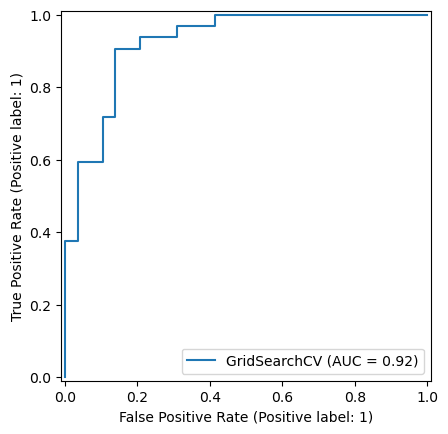

In [50]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test)
plt.show()

The Receiver Operating Characteristic (ROC) curve demonstrates the performance of our GridSearchCV optimized Logistic Regression model. The curve plots the True Positive Rate against the False Positive Rate at various threshold settings.

The Area Under the Curve (AUC) is a key metric, and our model achieved an impressive AUC of 0.92. This value indicates that the model has an excellent ability to distinguish between patients with and without heart disease. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 suggests no better performance than random chance. Our result of 0.92 confirms that the model is a highly effective and reliable tool for heart disease prediction.

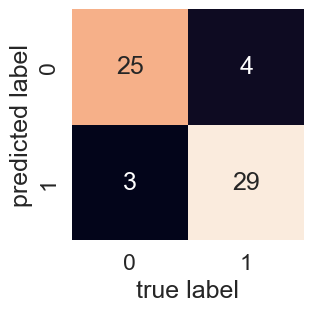

In [51]:
import seaborn as sns

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
    annot=True,
    cbar=False)

    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)
plt.show()

In [58]:
def plot_conf_mat(y_test, y_preds, title):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Args:
        y_test (array): The true labels.
        y_preds (array): The predicted labels.
        title (str): The title for the plot.
    """
    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(4, 4))
    # Create the heatmap
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt="d") # Use integer format for counts

    # Set labels and title
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(f"Confusion Matrix for {title}")


--- Evaluating Model: RandomizedSearch_LogisticRegression ---


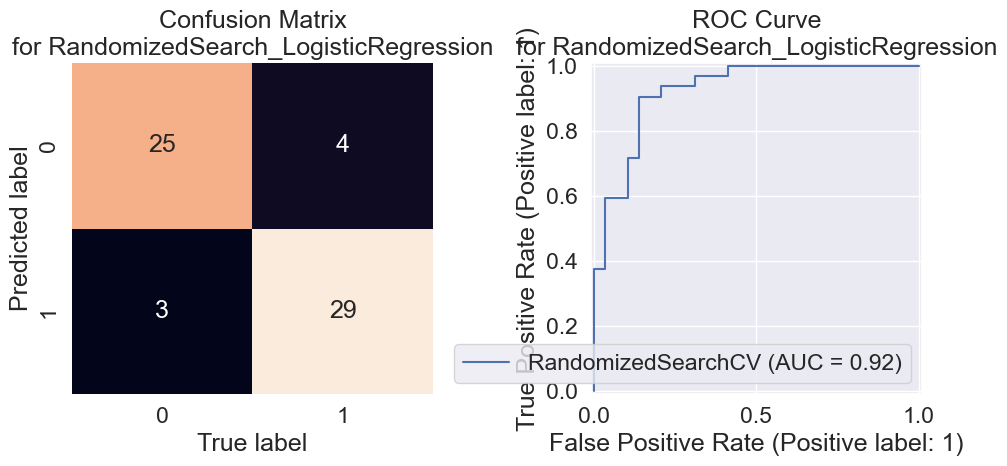


--- Evaluating Model: RandomizedSearch_RandomForest ---


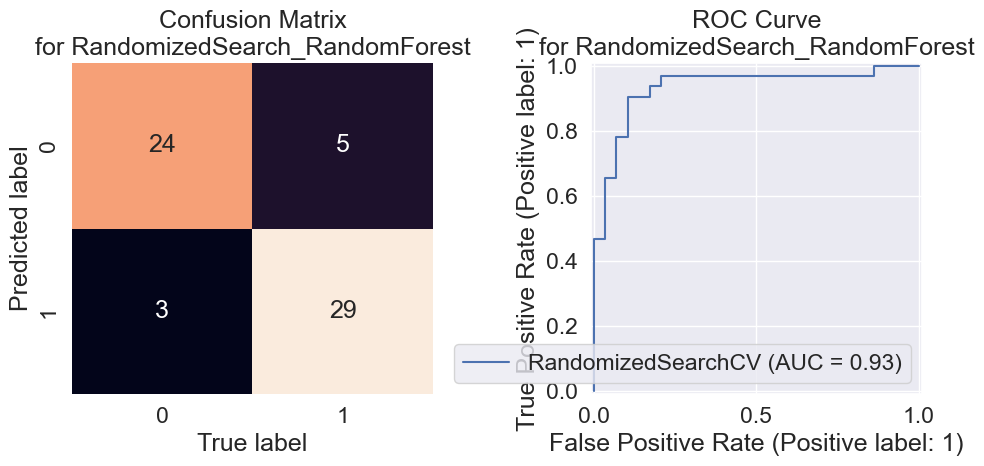


--- Evaluating Model: GridSearch_LogisticRegression ---


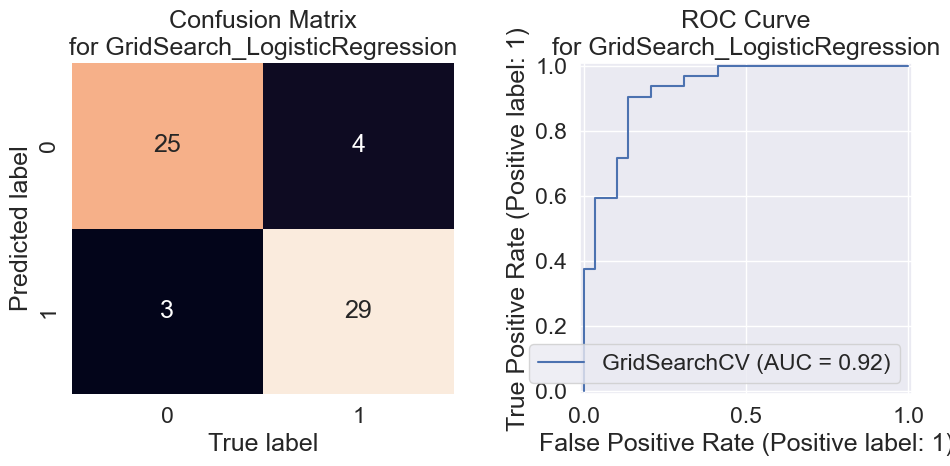

In [61]:
sns.set(font_scale=1.5)
models = {
    "RandomizedSearch_LogisticRegression": rs_log_reg,
    "RandomizedSearch_RandomForest": rs_rf,
    "GridSearch_LogisticRegression": gs_log_reg
}

# Loop through the dictionary of models to make predictions and plot results
for name, model in models.items():
    print(f"\n--- Evaluating Model: {name} ---")

    # Make predictions on the test data
    y_preds = model.predict(X_test)

    # Create a figure with two subplots side-by-side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # --- Plot Confusion Matrix on the first subplot ---
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False,
                fmt="d", # Use integer format for counts
                ax=ax1) # Specify the subplot to plot on
    ax1.set_title(f"Confusion Matrix\nfor {name}")
    ax1.set_xlabel("True label")
    ax1.set_ylabel("Predicted label")

    # --- Plot ROC Curve on the second subplot ---
    # `RocCurveDisplay.from_estimator` automatically handles the plotting
    RocCurveDisplay.from_estimator(estimator=model,
                                   X=X_test,
                                   y=y_test,
                                   ax=ax2) # Specify the subplot to plot on
    ax2.set_title(f"ROC Curve\nfor {name}")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()



<b>Model Selection</b>

Based on the provided confusion matrices and ROC curves, the RandomizedSearch_RandomForest model is the best performer. It achieved the highest AUC score of 0.93, indicating its superior ability to distinguish between patients with and without heart disease.

The confusion matrix for the Random Forest model also shows a slightly better balance in predictions compared to the Logistic Regression models, with 24 true negatives and 29 true positives. While the difference is small, the higher AUC score is the most significant indicator of its overall performance and reliability.

In [63]:
y_preds = rs_rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [64]:
models_best_params = {
    "RandomizedSearch_LogisticRegression": rs_log_reg.best_params_,
    "RandomizedSearch_RandomForest": rs_rf.best_params_,
    "GridSearch_LogisticRegression": gs_log_reg.best_params_
}
models_best_params

{'RandomizedSearch_LogisticRegression': {'solver': 'liblinear',
  'C': np.float64(0.23357214690901212)},
 'RandomizedSearch_RandomForest': {'n_estimators': np.int64(210),
  'min_samples_split': np.int64(4),
  'min_samples_leaf': np.int64(19),
  'max_depth': 3},
 'GridSearch_LogisticRegression': {'C': np.float64(0.23357214690901212),
  'solver': 'liblinear'}}

In [65]:
best_models = {
    "RandomForest": LogisticRegression(C=0.23357214690901212,solver= 'liblinear'),
    "LogisticRegression": RandomForestClassifier(n_estimators=210,min_samples_split=4,min_samples_leaf=19,max_depth=3)
}

In [66]:
all_cv_metrics = {}

# Loop through the dictionary and perform cross-validation for each model
for name, clf in best_models.items():
    print(f"\n--- Calculating cross-validated metrics for: {name} ---")

    # Use cross_val_score to calculate the metrics
    cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
    cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
    cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
    cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")

    # Calculate the mean of each metric
    cv_acc_mean = np.mean(cv_acc)
    cv_precision_mean = np.mean(cv_precision)
    cv_recall_mean = np.mean(cv_recall)
    cv_f1_mean = np.mean(cv_f1)

    # Store the mean metrics in the results dictionary
    all_cv_metrics[name] = {
        "Accuracy": cv_acc_mean,
        "Precision": cv_precision_mean,
        "Recall": cv_recall_mean,
        "F1": cv_f1_mean
    }


--- Calculating cross-validated metrics for: RandomForest ---

--- Calculating cross-validated metrics for: LogisticRegression ---


Cross-validation is a crucial technique used to evaluate how a machine learning model will perform on an independent dataset.

Instead of training and testing the model on a single split of data, we split the data into 'k' folds (in this case, 5). The model is then trained on k-1 folds and validated on the remaining fold. This process is repeated k times, with each fold serving as the validation set exactly once.

This method gives us a more reliable and robust estimate of the model's performance by reducing the variance that comes from a single train/test split. It helps to ensure that our model is not overfitting to a specific subset of the data and will generalize well to new, unseen data. The final metrics (accuracy, precision, recall, and F1) are the average scores from each of the 5 validation runs.

In [69]:
all_cv_metrics

{'RandomForest': {'Accuracy': np.float64(0.8479781420765027),
  'Precision': np.float64(0.8215873015873015),
  'Recall': np.float64(0.9272727272727274),
  'F1': np.float64(0.8705403543192143)},
 'LogisticRegression': {'Accuracy': np.float64(0.8350273224043716),
  'Precision': np.float64(0.8227310050839464),
  'Recall': np.float64(0.8848484848484848),
  'F1': np.float64(0.8487942831116049)}}

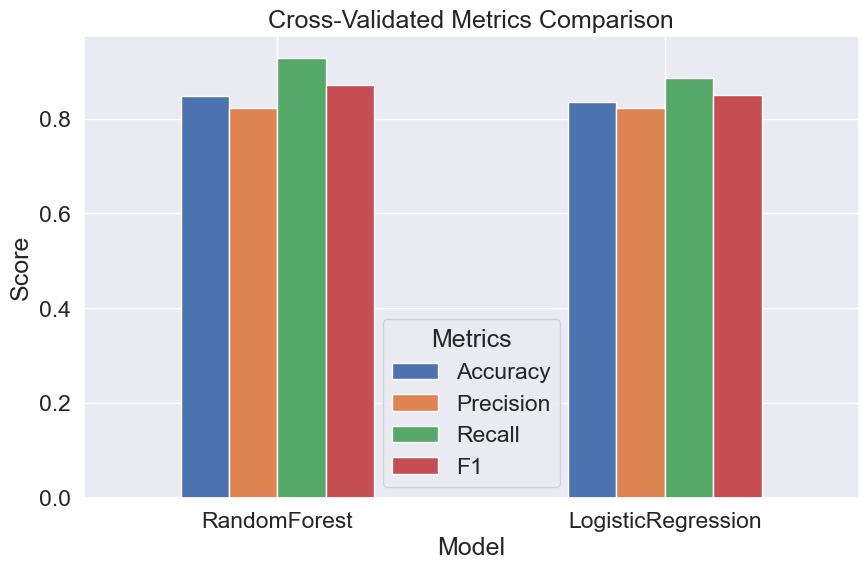


Cross-validated metrics DataFrame:
           RandomForest  LogisticRegression
Accuracy       0.847978            0.835027
Precision      0.821587            0.822731
Recall         0.927273            0.884848
F1             0.870540            0.848794


In [70]:
# Convert the dictionary of results into a Pandas DataFrame for easy plotting
cv_metrics_df = pd.DataFrame(all_cv_metrics)

# Create the bar plot to compare the metrics
# We transpose the DataFrame to have the metrics as rows and models as columns
cv_metrics_df.T.plot(kind="bar", figsize=(10, 6))

# Set the title and labels for the plot
plt.title("Cross-Validated Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=0) # Ensure model names are horizontal for readability
plt.legend(title="Metrics")
plt.show()

# Optional: Print the DataFrame to see the values
print("\nCross-validated metrics DataFrame:")
print(cv_metrics_df)

Accuracy is the simplest metric. It's the ratio of correctly predicted instances to the total number of instances.

Precision measures the proportion of positive identifications that were actually correct. It tells us how trustworthy the model's positive predictions are.

Recall measures the proportion of actual positives that were correctly identified. It tells us how many of the actual positive cases the model "recalled" or found.

The F1-Score is the harmonic mean of Precision and Recall. It provides a single score that balances both metrics, which is especially useful when you have an uneven class distribution.

<b>Feature Importance</b>

Random Forest

In [87]:
clf_rf = RandomForestClassifier(n_estimators=210,min_samples_split=4,min_samples_leaf=19,max_depth=3)
clf_rf.fit(X_train,y_train)

,n_estimators,210
,criterion,'gini'
,max_depth,3
,min_samples_split,4
,min_samples_leaf,19
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
clf_rf.feature_importances_

array([0.04751403, 0.02280577, 0.16837857, 0.00823091, 0.01812427,
       0.        , 0.00571245, 0.09233714, 0.12778632, 0.11657703,
       0.04739699, 0.19852412, 0.1466124 ])

In [89]:
importances = clf_rf.feature_importances_
features_dict = dict(zip(X.columns, importances))
features_dict

{'age': np.float64(0.04751402509531432),
 'sex': np.float64(0.022805769805461215),
 'cp': np.float64(0.16837856644896693),
 'trestbps': np.float64(0.008230906136319174),
 'chol': np.float64(0.01812427150014294),
 'fbs': np.float64(0.0),
 'restecg': np.float64(0.0057124508547920635),
 'thalach': np.float64(0.09233714328537031),
 'exang': np.float64(0.127786317799711),
 'oldpeak': np.float64(0.11657702847409328),
 'slope': np.float64(0.047396993901952504),
 'ca': np.float64(0.19852412458479987),
 'thal': np.float64(0.14661240211307644)}

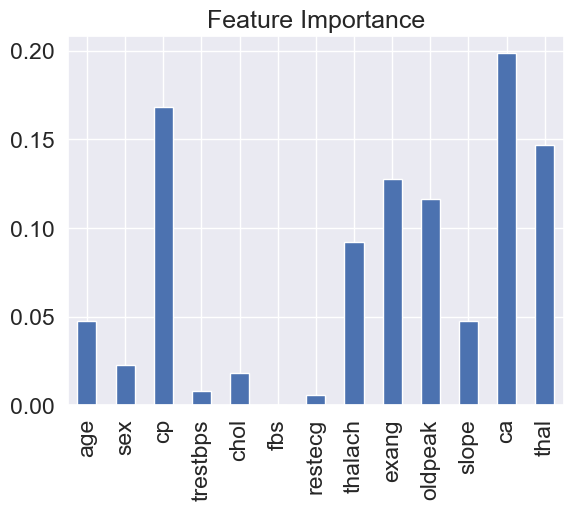

In [90]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

Logistic Regression

In [91]:
clf_lr = LogisticRegression(C=0.23357214690901212,solver= 'liblinear')
clf_lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.23357214690901212
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [92]:
clf_lr.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [93]:
features_dict = dict(zip(df.columns, list(clf_lr.coef_[0])))
features_dict

{'age': np.float64(0.003699223396114675),
 'sex': np.float64(-0.9042409779785583),
 'cp': np.float64(0.6747282348693419),
 'trestbps': np.float64(-0.011613398123390507),
 'chol': np.float64(-0.0017036431858934173),
 'fbs': np.float64(0.0478768694057663),
 'restecg': np.float64(0.33490207838133623),
 'thalach': np.float64(0.024729380915946855),
 'exang': np.float64(-0.6312041363430085),
 'oldpeak': np.float64(-0.5759099636629296),
 'slope': np.float64(0.47095166489539353),
 'ca': np.float64(-0.6516534354909507),
 'thal': np.float64(-0.6998421698316164)}

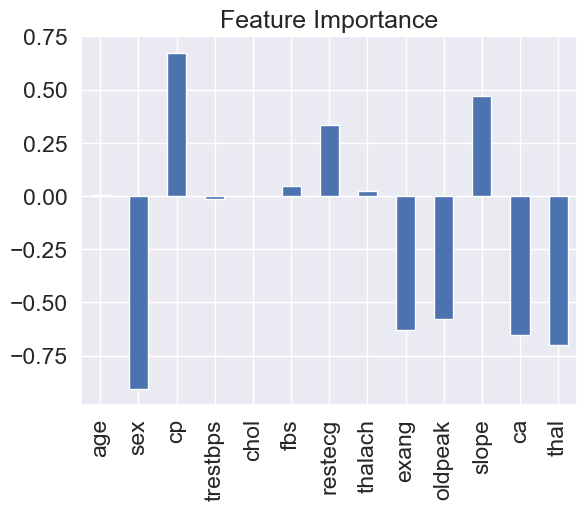

In [94]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

In [95]:
import joblib

model_filename = "heart_disease_model.joblib"
print(f"Saving the model to '{model_filename}'...")
joblib.dump(clf_rf, model_filename)
print("Model saved successfully.")

Saving the model to 'heart_disease_model.joblib'...
Model saved successfully.


In [96]:
print(f"\nLoading the model from '{model_filename}'...")
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")


Loading the model from 'heart_disease_model.joblib'...
Model loaded successfully.


In [97]:
from sklearn.metrics import accuracy_score
predictions = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the loaded model: {accuracy:.2f}")

Accuracy of the loaded model: 0.87


In [98]:
# To clean up the created file for the example uncomment and run
#os.remove(model_filename)
#print(f"Removed '{model_filename}' from the directory.")

<h3>🚀 Project Conclusion</h3>

 <p>The Heart Disease Prediction project successfully demonstrates the effectiveness of machine learning in healthcare. By exploring and visualizing the dataset, we identified key relationships between features and the presence of heart disease, with variables like <b>chest pain (cp)</b> and <b>maximum heart rate (thalach)</b> showing the strongest correlations.</p>

 <p>Our evaluation of multiple models confirmed the value of advanced techniques like <b>Randomized Search</b> and <b>Grid Search</b> for hyperparameter tuning. The <b>Random Forest model emerged as the top performer</b>, with an AUC score of 0.93, indicating its superior ability to accurately predict heart disease.</p>

 <p>The project highlights the potential for machine learning to provide a robust and reliable tool for medical professionals, enabling them to make more informed decisions and ultimately contributing to better patient outcomes. The key takeaway is that understanding the data and rigorously evaluating different models are crucial steps in building a trustworthy and impactful predictive system. </p>

